## Bibliotecas usadas

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from statsmodels.tsa.stattools import adfuller

## Importando dados

In [2]:
Dados_Pb_14_18 = pd.read_excel("SH_PB_14_18.xlsx")
Dados_Pb_19_23 = pd.read_excel("SH_PB_19_23.xlsx")


Dados_PE_14_18 = pd.read_excel("SH_PE_14_18.xlsx")
Dados_PE_19_23 = pd.read_excel("SH_PE_19_23.xlsx")

Dados_RN_14_18 = pd.read_excel("SH_RN_14_18.xlsx")
Dados_RN_19_23 = pd.read_excel("SH_RN_19_23.xlsx")

## Analise preços na Paraíba

### Verificação Inicial dos dados

In [3]:
# Verificar em quais colunas existem valores nulos,e  a quantidade de valores nulos em cada coluna

print("Dados Faltantes 14_18:\n\n\n")

Semregistro1 = Dados_Pb_19_23.isnull().sum()

for i in range(len(Semregistro1)):
    if Semregistro1[i] > 0:
        print(Semregistro1.index[i], Semregistro1[i])


Dados Faltantes 14_18:



Produto/Unidade 7
Nível de Comercialização 22
2019-01-01 00:00:00 7
2019-02-01 00:00:00 10
2019-03-01 00:00:00 24
2019-04-01 00:00:00 26
2019-05-01 00:00:00 28
2019-06-01 00:00:00 34
2019-07-01 00:00:00 33
2019-08-01 00:00:00 30
2019-09-01 00:00:00 30
2019-10-01 00:00:00 30
2019-11-01 00:00:00 30
2019-12-01 00:00:00 28
2020-01-01 00:00:00 27
2020-02-01 00:00:00 30
2020-03-01 00:00:00 32
2020-04-01 00:00:00 32
2020-05-01 00:00:00 29
2020-06-01 00:00:00 28
2020-07-01 00:00:00 29
2020-08-01 00:00:00 29
2020-09-01 00:00:00 29
2020-10-01 00:00:00 28
2020-11-01 00:00:00 27
2020-12-01 00:00:00 31
2021-01-01 00:00:00 28
2021-02-01 00:00:00 28
2021-03-01 00:00:00 28
2021-04-01 00:00:00 28
2021-05-01 00:00:00 30
2021-06-01 00:00:00 27
2021-07-01 00:00:00 29
2021-08-01 00:00:00 28
2021-09-01 00:00:00 29
2021-10-01 00:00:00 29
2021-11-01 00:00:00 29
2021-12-01 00:00:00 26
2022-01-01 00:00:00 27
2022-02-01 00:00:00 30
2022-03-01 00:00:00 30
2022-04-01 00:00:00 30
2022-05-0

In [4]:
print("\n\n\nDados Faltantes 19_23:\n\n\n")

Semregistro2 = Dados_Pb_19_23.isnull().sum()

for i in range(len(Semregistro2)):
    if Semregistro2[i] > 0:
        print(Semregistro2.index[i], Semregistro2[i])




Dados Faltantes 19_23:



Produto/Unidade 7
Nível de Comercialização 22
2019-01-01 00:00:00 7
2019-02-01 00:00:00 10
2019-03-01 00:00:00 24
2019-04-01 00:00:00 26
2019-05-01 00:00:00 28
2019-06-01 00:00:00 34
2019-07-01 00:00:00 33
2019-08-01 00:00:00 30
2019-09-01 00:00:00 30
2019-10-01 00:00:00 30
2019-11-01 00:00:00 30
2019-12-01 00:00:00 28
2020-01-01 00:00:00 27
2020-02-01 00:00:00 30
2020-03-01 00:00:00 32
2020-04-01 00:00:00 32
2020-05-01 00:00:00 29
2020-06-01 00:00:00 28
2020-07-01 00:00:00 29
2020-08-01 00:00:00 29
2020-09-01 00:00:00 29
2020-10-01 00:00:00 28
2020-11-01 00:00:00 27
2020-12-01 00:00:00 31
2021-01-01 00:00:00 28
2021-02-01 00:00:00 28
2021-03-01 00:00:00 28
2021-04-01 00:00:00 28
2021-05-01 00:00:00 30
2021-06-01 00:00:00 27
2021-07-01 00:00:00 29
2021-08-01 00:00:00 28
2021-09-01 00:00:00 29
2021-10-01 00:00:00 29
2021-11-01 00:00:00 29
2021-12-01 00:00:00 26
2022-01-01 00:00:00 27
2022-02-01 00:00:00 30
2022-03-01 00:00:00 30
2022-04-01 00:00:00 30
2022-0

In [5]:
# Verificar se as quantidades armazendads em cada coluna de Semregistro1 e Semregistro2 são iguais
print(Semregistro1.equals(Semregistro2))

True


### Separando os dados

In [6]:
Dados_Pb_14_18["Nível de Comercialização"].value_counts()

ATACADO     32
PRODUTOR    28
VAREJO      23
Name: Nível de Comercialização, dtype: int64

In [7]:
Dados_Pb_19_23["Nível de Comercialização"].value_counts()

ATACADO     31
PRODUTOR    25
VAREJO      22
Name: Nível de Comercialização, dtype: int64

In [8]:
# prencher as linhas vazias da cluna "Nível de Comercialização" com o valor "Produtor"

#Dados_Pb_14_18["Nível de Comercialização"].fillna("PRODUTOR", inplace=True)
#Dados_Pb_19_23["Nível de Comercialização"].fillna("PRODUTOR", inplace=True)

# Separar dados pelo nível de Comercialização -> Produtor,Atacadista e Varejista em 14_18 e 19_23

#Dados_Pb_14_18_Produtor = Dados_Pb_14_18[Dados_Pb_14_18["Nível de Comercialização"] == "PRODUTOR"]
Dados_Pb_14_18_Atacadista = Dados_Pb_14_18[Dados_Pb_14_18["Nível de Comercialização"] == "ATACADO"]
Dados_Pb_14_18_Varejista = Dados_Pb_14_18[Dados_Pb_14_18["Nível de Comercialização"] == "VAREJO"]


#Dados_Pb_19_23_Produtor = Dados_Pb_19_23[Dados_Pb_19_23["Nível de Comercialização"] == "PRODUTOR"]
Dados_Pb_19_23_Atacadista = Dados_Pb_19_23[Dados_Pb_19_23["Nível de Comercialização"] == "ATACADO"]
Dados_Pb_19_23_Varejista = Dados_Pb_19_23[Dados_Pb_19_23["Nível de Comercialização"] == "VAREJO"]

In [9]:
# Interpretando com numpy

d1418a = np.array(Dados_Pb_14_18_Atacadista[Dados_Pb_14_18_Atacadista.columns[3:]])
d1923a = np.array(Dados_Pb_19_23_Atacadista[Dados_Pb_19_23_Atacadista.columns[3:]])

d1418v = np.array(Dados_Pb_14_18_Varejista[Dados_Pb_14_18_Varejista.columns[3:]])
d1923v = np.array(Dados_Pb_19_23_Varejista[Dados_Pb_19_23_Varejista.columns[3:]])


l1418a = np.array(Dados_Pb_14_18_Atacadista[Dados_Pb_14_18_Atacadista.columns[0]])
l1923a = np.array(Dados_Pb_19_23_Atacadista[Dados_Pb_19_23_Atacadista.columns[0]])

l1418v = np.array(Dados_Pb_14_18_Varejista[Dados_Pb_14_18_Varejista.columns[0]])
l1923v = np.array(Dados_Pb_19_23_Varejista[Dados_Pb_19_23_Varejista.columns[0]])







In [10]:
# Pegar os valores  FARINHA DE MANDIOCA FINA TIPO 1 SECA (25 kg), FARINHA DE TRIGO ENRIQUECIDA TIPO 1 (10 kg), OLEO DE SOJA REFINADO (20 un), OVOS DE GALINHA GRANDE BRANCO (20 dz),  LEITE DE VACA LONGA VIDA INTEGRAL (12 l),


ItensA1418 = [np.where(l1418a == "FARINHA DE MANDIOCA FINA TIPO 1 SECA (25 kg)")[0][0],np.where(l1418a == "FARINHA DE TRIGO ENRIQUECIDA TIPO 1 (10 kg)")[0][0],np.where(l1418a == "OLEO DE SOJA REFINADO (20 latas)")[0][0],
np.where(l1418a == "OVOS DE GALINHA GRANDE BRANCO (20 dz)")[0][0],np.where(l1418a == "LEITE DE VACA LONGA VIDA INTEGRAL (12 l)")[0][0]]

ItensA1923 =  [np.where(l1923a == "FARINHA DE MANDIOCA FINA TIPO 1 SECA (25 kg)")[0][0],np.where(l1923a == "FARINHA DE TRIGO ENRIQUECIDA TIPO 1 (10 kg)")[0][0],np.where(l1923a == "OLEO DE SOJA REFINADO (20 un)")[0][0],
np.where(l1923a == "OVOS DE GALINHA GRANDE BRANCO (20 dz)")[0][0],np.where(l1923a == "LEITE DE VACA LONGA VIDA INTEGRAL (12 l)")[0][0]]







In [11]:
# OLEO DE SOJA REFINADO (900 ml), LEITE DE VACA LONGA VIDA INTEGRAL (l), { FARINHA DE TRIGO ESPECIAL (kg),   FARINHA DE TRIGO ENRIQUECIDA TIPO 1 (kg)} , FARINHA DE MANDIOCA MÉDIA TIPO 1 SECA (kg)

ItensV1418 = [np.where(l1418v == "OLEO DE SOJA REFINADO (900 ml)")[0][0],np.where(l1418v == "LEITE DE VACA LONGA VIDA INTEGRAL (l)")[0][0],np.where(l1418v == "FARINHA DE TRIGO ESPECIAL (kg)")[0][0],np.where(l1418v == "FARINHA DE MANDIOCA MÉDIA TIPO 1 SECA (kg)")[0][0]]

itensV1923 =  [np.where(l1923v == "OLEO DE SOJA REFINADO (900 ml)")[0][0],np.where(l1923v == "LEITE DE VACA LONGA VIDA INTEGRAL (l)")[0][0],np.where(l1923v == "FARINHA DE TRIGO ENRIQUECIDA TIPO 1 (kg)")[0][0],np.where(l1923v == "FARINHA DE MANDIOCA MÉDIA TIPO 1 SECA (kg)")[0][0]]

In [12]:
print(l1418v[ItensV1418])
print("\n")
print(l1923v[itensV1923])

['OLEO DE SOJA REFINADO (900 ml)' 'LEITE DE VACA LONGA VIDA INTEGRAL (l)'
 'FARINHA DE TRIGO ESPECIAL (kg)'
 'FARINHA DE MANDIOCA MÉDIA TIPO 1 SECA (kg)']


['OLEO DE SOJA REFINADO (900 ml)' 'LEITE DE VACA LONGA VIDA INTEGRAL (l)'
 'FARINHA DE TRIGO ENRIQUECIDA TIPO 1 (kg)'
 'FARINHA DE MANDIOCA MÉDIA TIPO 1 SECA (kg)']


In [13]:
ValoresA1418 = d1418a[ItensA1418]
ValoresA1923 = d1923a[ItensA1923]

ValoresV1418 = d1418v[ItensV1418]
ValoresV1923 = d1923v[itensV1923]


### Tratamento de valores nulos

In [14]:
def MesesNan(data):
    lista = []

    for i in range(len(data[0])): # todos os meses       

        lista.append(np.sum(np.isnan(data[:,i])))# soma os nans de todos os produto naquele mes
        

    for i in range(len(lista)//12):
        print("Ja|Fe|Ma|Ab|Ma|Ju|Ju|Ag|Se|Ou|No|De")
        print(lista[i*12:(i+1)*12])

In [15]:
MesesNan(ValoresA1418)
print("\n")
MesesNan(ValoresA1923)
print("\n")
MesesNan(ValoresV1418)
print("\n")
MesesNan(ValoresV1923)


Ja|Fe|Ma|Ab|Ma|Ju|Ju|Ag|Se|Ou|No|De
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
Ja|Fe|Ma|Ab|Ma|Ju|Ju|Ag|Se|Ou|No|De
[5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 0]
Ja|Fe|Ma|Ab|Ma|Ju|Ju|Ag|Se|Ou|No|De
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Ja|Fe|Ma|Ab|Ma|Ju|Ju|Ag|Se|Ou|No|De
[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]
Ja|Fe|Ma|Ab|Ma|Ju|Ju|Ag|Se|Ou|No|De
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


Ja|Fe|Ma|Ab|Ma|Ju|Ju|Ag|Se|Ou|No|De
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Ja|Fe|Ma|Ab|Ma|Ju|Ju|Ag|Se|Ou|No|De
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Ja|Fe|Ma|Ab|Ma|Ju|Ju|Ag|Se|Ou|No|De
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Ja|Fe|Ma|Ab|Ma|Ju|Ju|Ag|Se|Ou|No|De
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Ja|Fe|Ma|Ab|Ma|Ju|Ju|Ag|Se|Ou|No|De
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Ja|Fe|Ma|Ab|Ma|Ju|Ju|Ag|Se|Ou|No|De
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
Ja|Fe|Ma|Ab|Ma|Ju|Ju|Ag|Se|Ou|No|De
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3]
Ja|Fe|Ma|Ab|Ma|Ju|Ju|Ag|Se|Ou|No|De
[3, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
Ja|Fe|Ma|Ab|Ma|Ju|Ju|Ag|Se|Ou|No|De
[0, 0, 0, 0

In [16]:
# retirando Meses que possuem muitos valores nulos

ValoresV1418  =  ValoresV1418[::,26:]
ValoresA1418 = ValoresA1418[::,23:]

# Substituir Nans por 0

ValoresA1418[np.isnan(ValoresA1418)] = 0
ValoresA1923[np.isnan(ValoresA1923)] = 0

ValoresV1418[np.isnan(ValoresV1418)] = 0
ValoresV1923[np.isnan(ValoresV1923)] = 0

In [17]:
def ZeroForMean(dados):
    
    for s in range(len(dados)):
        for i in range(len(dados[s])):
            if dados[s,i] == 0:
                dados[s,i] = np.mean(dados[s])
    return dados
    
    
def ZeroForPercentil(dados):
    
    percentil25 = np.percentile(dados, 25)
    percentil75 = np.percentile(dados, 75)
    
    # Substituir os valores iguais a zero, por um aleatório entre o percentil 25 e 75
    
    for s in range(len(dados)):
        for i in range(len(dados[s])):
            if dados[s,i] == 0:
                dados[s,i] = np.random.uniform(percentil25,percentil75)
                
    return dados

In [18]:
ValoresA1418 = ZeroForPercentil(ValoresA1418)
ValoresA1923 = ZeroForPercentil(ValoresA1923)

ValoresV1418 = ZeroForPercentil(ValoresV1418)
ValoresV1923 = ZeroForPercentil(ValoresV1923)


In [19]:
MesesNan(ValoresA1418)
print("\n")
MesesNan(ValoresA1923)
print("\n")
MesesNan(ValoresV1418)
print("\n")
MesesNan(ValoresV1923)


Ja|Fe|Ma|Ab|Ma|Ju|Ju|Ag|Se|Ou|No|De
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Ja|Fe|Ma|Ab|Ma|Ju|Ju|Ag|Se|Ou|No|De
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Ja|Fe|Ma|Ab|Ma|Ju|Ju|Ag|Se|Ou|No|De
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Ja|Fe|Ma|Ab|Ma|Ju|Ju|Ag|Se|Ou|No|De
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Ja|Fe|Ma|Ab|Ma|Ju|Ju|Ag|Se|Ou|No|De
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Ja|Fe|Ma|Ab|Ma|Ju|Ju|Ag|Se|Ou|No|De
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Ja|Fe|Ma|Ab|Ma|Ju|Ju|Ag|Se|Ou|No|De
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Ja|Fe|Ma|Ab|Ma|Ju|Ju|Ag|Se|Ou|No|De
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Ja|Fe|Ma|Ab|Ma|Ju|Ju|Ag|Se|Ou|No|De
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Ja|Fe|Ma|Ab|Ma|Ju|Ju|Ag|Se|Ou|No|De
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Ja|Fe|Ma|Ab|Ma|Ju|Ju|Ag|Se|Ou|No|De
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Ja|Fe|Ma|Ab|Ma|Ju|Ju|Ag|Se|Ou|No|De
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Ja|Fe|Ma|Ab|Ma|Ju|Ju|Ag|Se|Ou|No|De
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Ja|Fe|Ma|Ab|Ma|Ju|Ju|Ag|Se|Ou|No|De
[0, 0, 0,

### Concatenar Dados

In [20]:
ValoresAtacado = np.concatenate((ValoresA1418,ValoresA1923),axis = 1)


### Vizualização Inicial dos dados

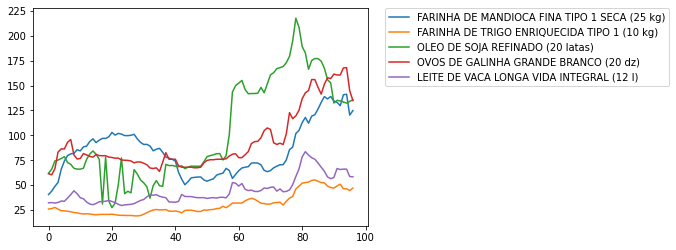

In [21]:
for i in range(len(ValoresAtacado)):
    plt.plot(ValoresAtacado[i])
    plt.legend(l1418a[ItensA1418],bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

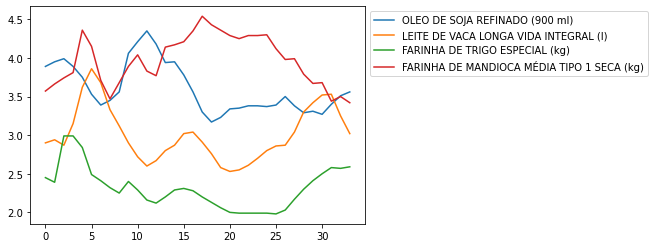

In [22]:
for i in range(len(ValoresV1418)):
    plt.plot(ValoresV1418[i])
    plt.legend(l1418v[ItensV1418],loc = "upper left",bbox_to_anchor=(1,1))

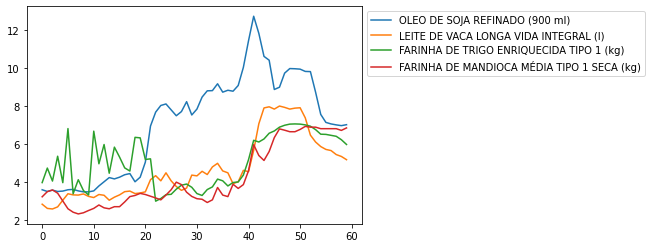

In [23]:
for i in range(len(ValoresV1923)):
    plt.plot(ValoresV1923[i])
    plt.legend(l1923v[itensV1923],loc = "upper left",bbox_to_anchor=(1,1))

### Verificar Decomposição da série

In [35]:
# Teste para verificar se a série é estacionária
def test_stationarity(series):
    # Teste de ADF
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')

    # Verificar o p-valor
    if result[1] <= 0.05:
        print("A série é estacionária")
    else:
        print("A série não é estacionária")
        
    

In [36]:
for i in range(len(ValoresAtacado)):
    
    print(l1418a[ItensA1418][i])
    test_stationarity(ValoresAtacado[i])
    print("\n")

FARINHA DE MANDIOCA FINA TIPO 1 SECA (25 kg)
ADF Statistic: -1.1904840688294902
p-value: 0.6776757709948382
Critical Values:
   1%: -3.5011373281819504
   5%: -2.8924800524857854
   10%: -2.5832749307479226
A série não é estacionária


FARINHA DE TRIGO ENRIQUECIDA TIPO 1 (10 kg)
ADF Statistic: -0.5325646185392743
p-value: 0.885503554649976
Critical Values:
   1%: -3.5019123847798657
   5%: -2.892815255482889
   10%: -2.583453861475781
A série não é estacionária


OLEO DE SOJA REFINADO (20 latas)
ADF Statistic: -1.2973657803832697
p-value: 0.6303766089696633
Critical Values:
   1%: -3.5003788874873405
   5%: -2.8921519665075235
   10%: -2.5830997960069446
A série não é estacionária


OVOS DE GALINHA GRANDE BRANCO (20 dz)
ADF Statistic: -0.5871931513590946
p-value: 0.8738496703128192
Critical Values:
   1%: -3.502704609582561
   5%: -2.8931578098779522
   10%: -2.583636712914788
A série não é estacionária


LEITE DE VACA LONGA VIDA INTEGRAL (12 l)
ADF Statistic: -0.40215044516739157
p-va

In [30]:
for i in range(len(ValoresV1418)):
    test_stationarity(ValoresV1418[i])

ADF Statistic: -2.7354628364242557
p-value: 0.0681001006090352
Critical Values:
   1%: -3.653519805908203
   5%: -2.9572185644531253
   10%: -2.6175881640625
A série não é estacionária
ADF Statistic: -3.8732499657387405
p-value: 0.002240774479259548
Critical Values:
   1%: -3.653519805908203
   5%: -2.9572185644531253
   10%: -2.6175881640625
A série é estacionária
ADF Statistic: -3.7544060802548813
p-value: 0.0034098065930037616
Critical Values:
   1%: -3.661428725118324
   5%: -2.960525341210433
   10%: -2.6193188033298647
A série é estacionária
ADF Statistic: -0.7743350413645945
p-value: 0.8265449649864574
Critical Values:
   1%: -3.6889256286443146
   5%: -2.9719894897959187
   10%: -2.6252957653061224
A série não é estacionária


In [31]:
for i in range(len(ValoresV1923)):
    test_stationarity(ValoresV1923[i])

ADF Statistic: -1.7427447040974406
p-value: 0.4092344771256895
Critical Values:
   1%: -3.548493559596539
   5%: -2.912836594776334
   10%: -2.594129155766944
A série não é estacionária
ADF Statistic: -1.7623129103377606
p-value: 0.3993261981911458
Critical Values:
   1%: -3.548493559596539
   5%: -2.912836594776334
   10%: -2.594129155766944
A série não é estacionária
ADF Statistic: -2.529927457084307
p-value: 0.10836139821383389
Critical Values:
   1%: -3.568485864
   5%: -2.92135992
   10%: -2.5986616
A série não é estacionária
ADF Statistic: 0.202668914889175
p-value: 0.9724108885874552
Critical Values:
   1%: -3.5506699942762414
   5%: -2.913766394626147
   10%: -2.5946240473991997
A série não é estacionária
